
## ELECCIÓN DEL THRESHOLD


Este script permite la visualización de la distribución de las diferencias entre la 2 probabilidad más altas asignadas a cada segmento por el programa __ChromHMM__ (diseñado para analizar datos de ChIP-Seq). En este caso se llevará a cabo sobre ficheros previamente filtrados con el script _"Generar_archivos_grafica_densidad.sh"_ que contienen solo los segmentos cuyo estado más probable es el 9. Estos deben estar contenido en una carpeta denominada "ARCHIVOS_GRAFICA_DISTRIBUCION" situada en el mismo directorio que este script. 

El objetivo es, en base a la distribución observada, establecer un valor de diferencias a partir del cual sea más probable que la asignación del estado 9 sea acertada.

Posteriormente se deberá llevar a cabo un nuevo filtrado para eliminar aquellos segmentos que no superen el valor establecido.   

In [1]:
# Importación de los paquetes necesarios
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [2]:
# Generación de las listas "c_types" y "chroms" que contienen el número
# del replicado y el número del cromosoma respectivamente para la posterior
# realización de un bucle que permita acceder a todos los archivos de tipo
# "posterior_state_9".
c_types = [1, 2]
chroms = list(range(1,23))
chroms.append("X")
chroms.append("M")

In [3]:
# Creación de una lista vacía a la que se le irán añadiendo las diferencias.
diff = []

# Bucle para acceder a todos los archivos de tipo "posterior_state_9"
for cell in c_types:
    cell = str(cell)
    for chrom in chroms:
        chrom = str(chrom)
        
        # Se abre el archivo
        f = open('./ARCHIVOS_GRAFICA_DISTRIBUCION/'+cell+'_posterior_state_9_chr'+chrom+'.txt', 'r')

        # Se recorre el archivo, se calcula la resta y se añade a la lista "diff"
        Data = f.readlines()
        for line in Data:
            if line != "" and line[0] in "0123456789":    # No se contabilizan las lineas vacías
                probs = line.strip().split("\t")          # ni aquellas que se corresponden con
                [e1, e2] = heapq.nlargest(2, probs)       # la cabecera del archivo en vez de con
                resta = float(e1)-float(e2)               # valores numéricos.
                diff.append(resta)
        
        # Se cierra el archivo
        f.close()
        


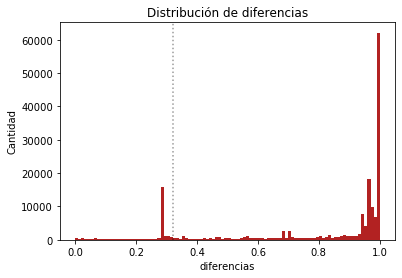

Threshold elegido: 0.32


In [6]:
# Histograma de las diferencias.
plot_diff = plt.hist(diff, bins=100, color= "firebrick")
# Creación del array "sumatorio" que contiene los valores acumulados del eje Y
# para cada valor del eje X (un total de 100).
sumatorio = np.cumsum(plot_diff[0])

# Selección de aquellas posiciones del array "sumatorio" cuyo valor es mayor que
# el 15% del número de segmentos analizados (igual al número de diferencias
# almacenadas en diff). 
Diferencias_pequeñas = np.where(sumatorio >= len(diff)*0.15)

# Visualización del plot.
plt.title("Distribución de diferencias")
plt.xlabel('diferencias')
plt.ylabel('Cantidad')

# Generación de una línea vertical en el punto del eje X en el que la cantidad
# de datos representados a la izquierda supone un 15% del total.
# Nota: se le suma 1 porque los índices en python comienzan con 0.
plt.axvline(x=(Diferencias_pequeñas[0][0]+1)/len(sumatorio), alpha=0.4, color="black", linestyle=":")

plt.show()

print("Threshold elegido:",plot_diff[1][Diferencias_pequeñas[0][0]+1])

## CONCLUSIÓN

Se puede observar como el histograma muestra un pico a la altura del 0,3 del eje X que resulta llamativo. Se concluyó que la gran cantidad de segmentos que presentaban una diferencia próxima a 0,3 podía deberse a un artificio introducido por el procesamiendo por ChromHMM y que, por lo tanto, podían no ser diferencias reales. Por este motivo decidimos descartar el 15% de segmentos, los de menor diferencia, pues este % dejaba fuera aquellos segmentos con diferencias próximas a 0,3. En concreto se estableció el threshold en 0.32.
